## Problem Statement
Our goal is to track the location (and velocity) of a moving object, e.g. a car,
in a 2-dimensional space. The only information available to us is the initial
location (and velocity) and a series of noisy measurements of the velocity as
the object moves in space. The key assumption of this problem is that the true
velocity of the object is known to be a constant. However, the constant velocity
is not known to us.

#### Link for Kalman Filter understanding <br>

https://www.kalmanfilter.net/alphabeta.html

In [10]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [11]:
m = 100 # Number of Measurements 

In [21]:
vx= 10 # x velocity(constant)
vy= 10 # y velocity(constant)

# add random noise to each constant velocity measurement

mx = np.array(vx+np.random.randn(m))
my = np.array(vy+np.random.randn(m))

measurements = np.vstack((mx,my)) #stacking vertically both the velocities
measurements[:,:5]

array([[10.13042538,  8.90964371, 10.95634251, 10.33047263, 10.02876328],
       [11.53955452,  9.55654537,  9.81204845, 10.90151278, 10.26398523]])

In [4]:
measurements.shape

(2, 100)

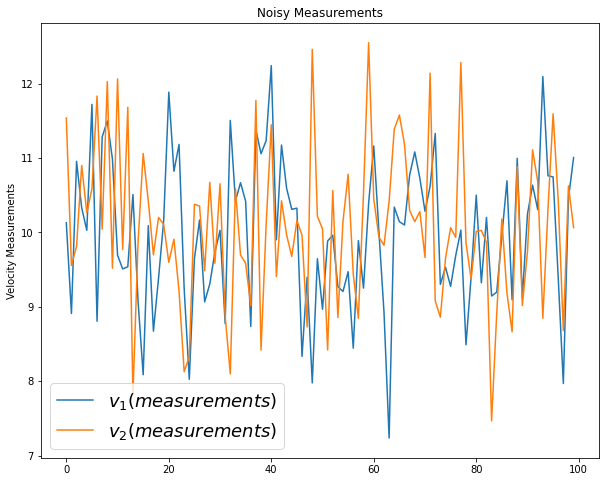

In [22]:
plt.figure(figsize=(10,8)) 
plt.plot(range(m),mx, label='$v_1 (measurements)$')
plt.plot(range(m),my, label='$v_2 (measurements)$')
plt.ylabel('Velocity Measurements')
plt.title('Noisy Measurements')
plt.legend(loc='best',prop={'size':18})
plt.show()

- By adding Noise the velocities vary from ~8-12. 

In [23]:
# Time Step between Filter Steps
dt = 0.1

# Identity matrix
I = np.eye(4)

# State matrix   
x = np.matrix([[0.0, 0.0, 0.0, 0.0]]).T   

# P matrix  -> Covariance Matrix (Joint variability for random variable)
P = np.diag([1000.0, 1000.0, 1000.0, 1000.0])

# A matrix -> To get the next state position (displacement using acceleration & velocity)
A = np.matrix([[1.0, 0.0, dt, 0.0],
              [0.0, 1.0, 0.0, dt],
              [0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0]])

# H matrix
H = np.matrix([[0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0]])
# print(H, H.shape)

# R matrix
r = 100

R = np.matrix([[r, 0.0],
              [0.0, r]])
# print(R, R.shape)

# Q, G matrices
s = 8.8
G = np.matrix([[0.5*dt**2],
               [0.5*dt**2],
                       [dt],
                       [dt]])
Q = G*G.T*s**2



In [24]:
# The Following variables will store the results, at each iteration - Important to note are xt, yt, dxt,dyt
xt = []
yt = []
dxt= []
dyt= []
Zx = []
Zy = []
Px = []
Py = []
Pdx= []
Pdy= []
Rdx= []
Rdy= []
Kx = []
Ky = []
Kdx= []
Kdy= []

In [25]:
# Kalman Filtering Algorithm
for n in range(len(measurements[0])): 
# Prediction
# state prediction
    x = A*x

# error covariance prediction
    P = A*P*A.T + Q

# Update Steps
# Kalman Gain
    S= H*P*H.T + R
    K = (P*H.T) * np.linalg.pinv(S)

#Update the estimate via z
    Z = measurements[:,n].reshape(2,1)
    y = Z - (H*x)
    x = x + (K*y) 
# error covariance
    P = (I -(K*H))*P 
# Storing results
    xt.append(float(x[0]))
    yt.append(float(x[1]))
    dxt.append(float(x[2]))
    dyt.append(float(x[3]))
    Zx.append(float(Z[0]))
    Zy.append(float(Z[1]))
    Px.append(float(P[0,0]))
    Py.append(float(P[1,1]))
    Pdx.append(float(P[2,2]))
    Pdy.append(float(P[3,3]))
    Rdx.append(float(R[0,0]))
    Rdy.append(float(R[1,1]))
    Kx.append(float(K[0,0]))
    Ky.append(float(K[1,0]))
    Kdx.append(float(K[2,0]))
    Kdy.append(float(K[3,0]))


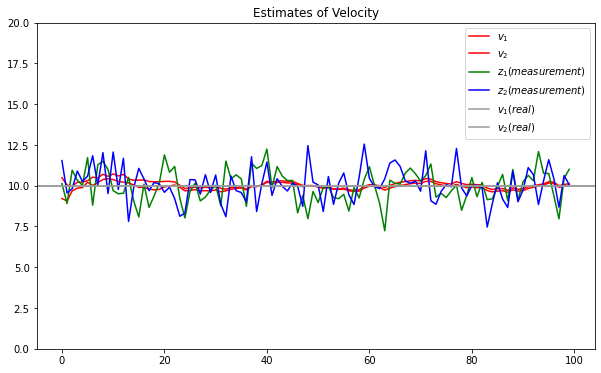

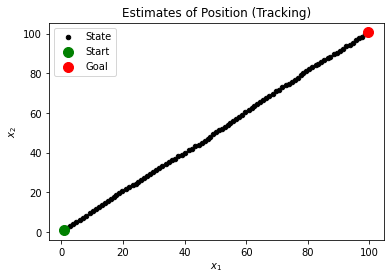

In [26]:
# Velocity Measurements
# Our estimates are in Red
plt.figure(figsize=(10,6))
plt.plot(range(len(measurements[0])),dxt, label='$v_1$', c='r')
plt.plot(range(len(measurements[0])),dyt, label='$v_2$', c='r')

# The noisy velocity measurements in both directions are in green and blue.
plt.plot(range(len(measurements[0])),mx, label='$z_1 (measurement)$', c='g')
plt.plot(range(len(measurements[0])),my, label='$z_2 (measurement)$', c='b')

# The actual constant velocity for both directions are in black
plt.axhline(vx, color='#999999', label='$v_1(real)$')
plt.axhline(vy, color='#999999', label='$v_2(real)$')
plt.title('Estimates of Velocity')
plt.legend(loc='best')
plt.ylim([0, 20])
plt.show()

# Position Tracking
# Scatter plot of x and y location estimates in black
# these should ideally form a straight line
plt.scatter(xt,yt, s=20, label='State', c='black')

# starting point in green and end point in red
plt.scatter(xt[0],yt[0], s=100, label='Start', c='g')
plt.scatter(xt[-1],yt[-1], s=100, label='Goal', c='r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Estimates of Position (Tracking)')
plt.legend(loc='best')
plt.show()
